In [1]:
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import matplotlib.pyplot as plt

In [20]:
import geopandas as gpd

In [12]:
import mapclassify

In [5]:
bandPath = "C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\20m"
bandNames = os.listdir(bandPath)
bandNames

['T35TNH_20220914T085611_B01_20m.jp2',
 'T35TNH_20220914T085611_B02_20m.jp2',
 'T35TNH_20220914T085611_B03_20m.jp2',
 'T35TNH_20220914T085611_B04_20m.jp2',
 'T35TNH_20220914T085611_B05_20m.jp2',
 'T35TNH_20220914T085611_B06_20m.jp2',
 'T35TNH_20220914T085611_B07_20m.jp2',
 'T35TNH_20220914T085611_B11_20m.jp2',
 'T35TNH_20220914T085611_B12_20m.jp2',
 'T35TNH_20220914T085611_B8A_20m.jp2']

In [21]:
municipalities = gpd.read_file("C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\municipalities.geojson")
municipalities.crs #4326

In [22]:
burgas = municipalities[municipalities.nuts3 == "BGS"]
burgas_city = municipalities[municipalities.nuts4 == "BGS04"]

In [37]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(burgas_city.to_crs(epsg=32635))

In [24]:
bandName = bandNames[0]
rasterPath = os.path.join(bandPath,bandName)
rasterBand = rasterio.open(rasterPath)

In [27]:
rasterBand.crs

CRS.from_epsg(32635)

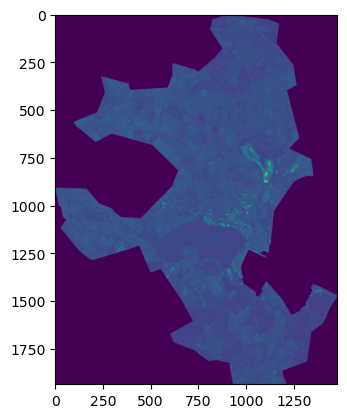

In [38]:
out_img, out_transform = mask(rasterBand, coords, crop=True)
out_meta = rasterBand.meta
show(out_img)

In [34]:

# outImage, outTransform = mask(rasterBand, burgas.to_crs(32635).geometry, crop=True)
# outMeta = rasterBand.meta
# outMeta.update({"driver": 'JP2OpenJPEG',
#                  "height": outImage.shape[1],
#                  "width": outImage.shape[2],
#                  "transform": outTransform})
# # outRaster = rasterio.open("../rst/"+bandName, "w", **outMeta) 
# # outRaster.write(outImage)
# # outRaster.close()

# #plot original and clipped rasters
# #bandZero = rasterio.open("../rst/"+bandName,'r')
# fig, ax = plt.subplots(figsize=(16,16))
# show(rasterBand, cmap='Blues', ax=ax)
# show(outImage, cmap='viridis', ax=ax)
# ax.set_ylim(rasterBand.bounds.bottom,rasterBand.bounds.top)
# ax.set_xlim(rasterBand.bounds.left,rasterBand.bounds.right)
# plt.show()


In [42]:
out_images_transforms_meta = []

for i in range(len(bandNames)):
    bandName = bandNames[i]
    rasterPath = os.path.join(bandPath,bandName)
    rasterBand = rasterio.open(rasterPath)

    out_img, out_transform = mask(rasterBand, coords, crop=True)
    out_meta = rasterBand.meta
    #show(out_img)
    j = i+1
    with rasterio.open(f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\burgas\\ortophoto_burgas_cropped_band{j}.tif", "w", **out_meta) as dest:
        dest.write(out_img)
        #but bands 11 and 12 are actually in this case 9 and 10

    out_images_transforms_meta.append((out_img, out_transform, out_meta))

    

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [43]:
b2_burgas = rasterio.open("C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\burgas\\ortophoto_burgas_cropped_band2.tif")

Image dimensions:  (5490, 5490)


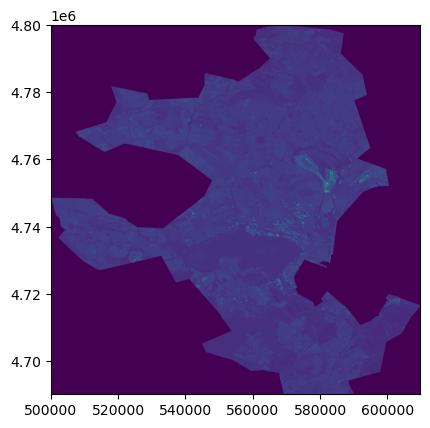

In [48]:
b2_burgas.read().shape
full_img = b2_burgas.read(1)
print("Image dimensions: ", full_img.shape)
show(full_img, transform=b2_burgas.transform)

In [49]:
band8 = rasterio.open("C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\burgas\\ortophoto_burgas_cropped_band8.tif").read(1)
band4 = rasterio.open("C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\burgas\\ortophoto_burgas_cropped_band4.tif").read(1)
ndvi = (band8.astype(float)-band4.astype(float))/(band8.astype(float)+band4.astype(float))

C:\Users\User\AppData\Local\Temp\ipykernel_20688\1168594842.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi = (band8.astype(float)-band4.astype(float))/(band8.astype(float)+band4.astype(float))


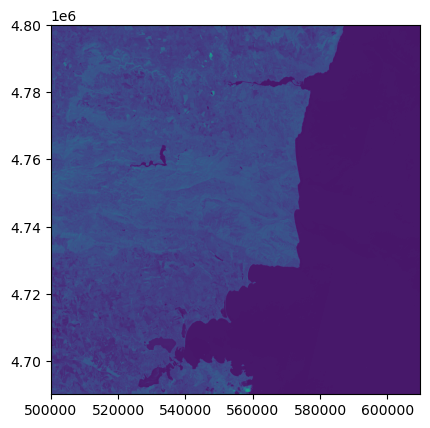

In [62]:
show(rasterBand)

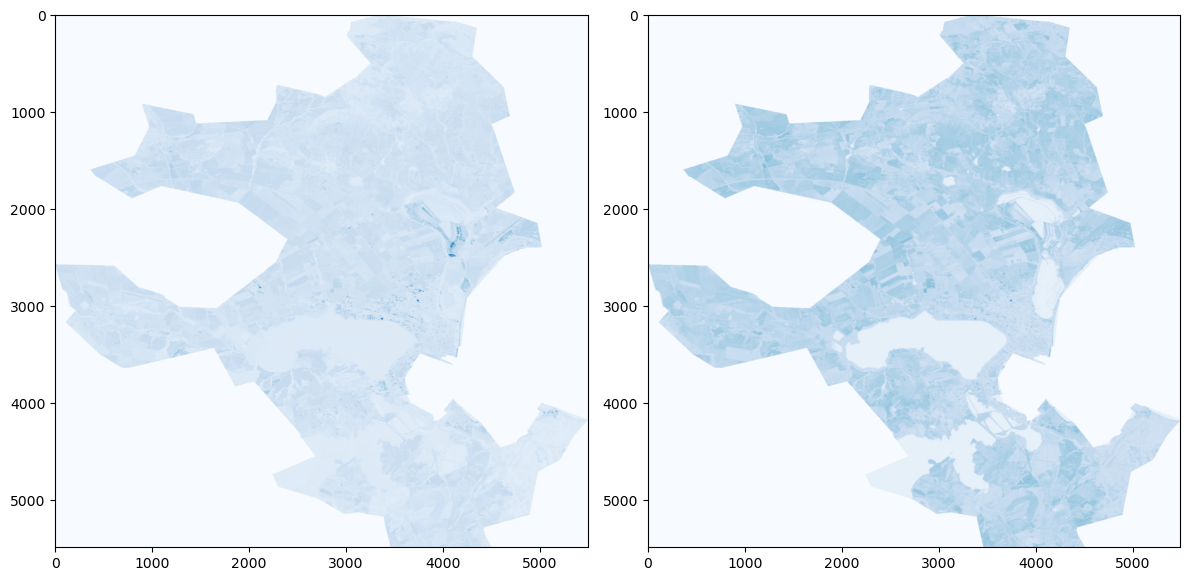

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
show(band4, ax=ax1, cmap='Blues') #red
show(band8, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

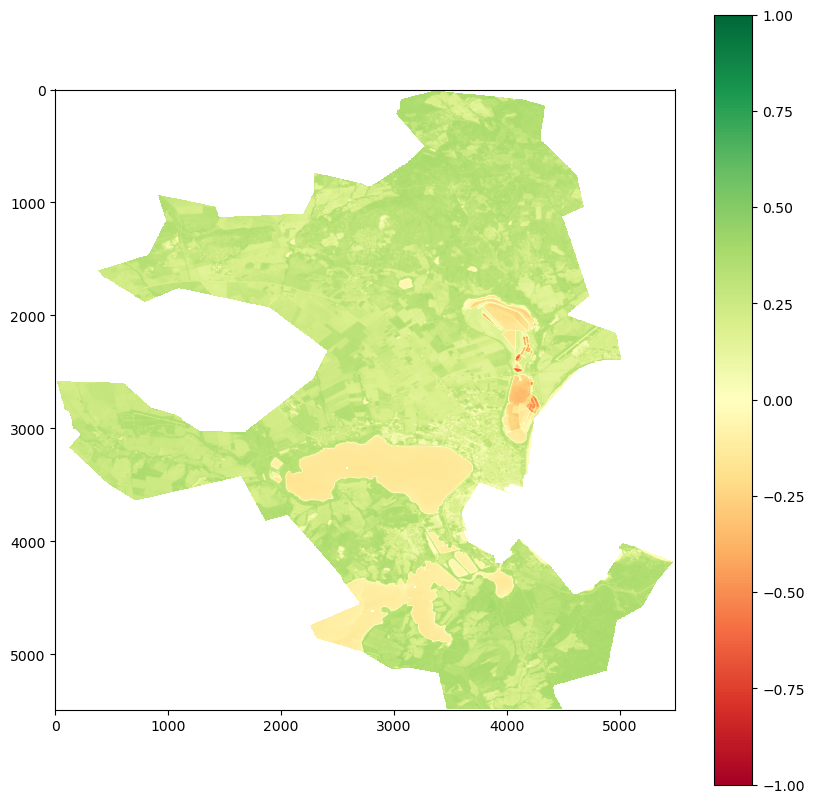

In [68]:
plt.figure(figsize = (10,10))
#show(rasterBand)
#show(ndvi,cmap="RdYlGn" )
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

In [70]:
ndvi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [51]:
import numpy as np

In [73]:
print('\nMax NDVI: {m}'.format(m=np.nanmax(ndvi)))
print('Mean NDVI: {m}'.format(m=np.nanmean(ndvi)))
print('Median NDVI: {m}'.format(m=np.nanmedian(ndvi)))
print('Min NDVI: {m}'.format(m=np.nanmin(ndvi)))


Max NDVI: 1.0
Mean NDVI: 0.229837441860851
Median NDVI: 0.2670157068062827
Min NDVI: -1.0
